In [ ]:
#Урок 6. Многоклассовая классификация.

#Посмотрим на примере алгоритма логистической регрессии и метода опорных векторов, как работать с различными методами многоклассовой классификации.

In [ ]:
# 1.

#Вспомните датасет Wine. Загрузите его, разделите на тренировочную и тестовую выборки (random_state=17), используя только [9, 11, 12] признаки.

In [1]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
wine_dataset = load_wine()
wine_dataset
# x = iris_dataset.data.T[0]
# y = iris_dataset.data.T[2]
# plt.scatter(x, y, alpha=0.3, s=100, c=iris_dataset.target)

In [ ]:
# iris_df = pd.DataFrame(data=iris_dataset)
# iris_df

In [29]:
features_binary =wine_dataset.data[9:12]
target_binary = wine_dataset.target[9:12]
target_binary

array([0, 0, 0])

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# рассмотрим бинарный классификатор - возьмем только первые два класса
features_binary = wine_dataset.data[:, [9, 11, 12]]
target_binary = wine_dataset.target#[

# разобьем датасет на тренировочные и тестовые данные
x_train, x_test, y_train, y_test = train_test_split(features_binary, 
                                                    target_binary,
                                                    random_state=17)

#print(x_train, x_test, y_train, y_test)
print(f'X_train shape: {x_train.shape}, y_train shape: {y_train.shape},\n'
      f'X_test shape: {x_test.shape}, y_test shape: {y_test.shape}')

X_train shape: (133, 3), y_train shape: (133,),
X_test shape: (45, 3), y_test shape: (45,)


In [ ]:
#Задайте тип кросс-валидации с помощью StratifiedKFold: 5-кратная, random_state=17.

In [48]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [36]:
skf = StratifiedKFold(n_splits=5,random_state=17,shuffle=True)
skf.get_n_splits(features_binary, target_binary)
#print(skf)
#StratifiedKFold(n_splits=5, random_state=17,shuffle=True)
for train_index, test_index in skf.split(features_binary, target_binary):
     print("TRAIN:", train_index, "TEST:", test_index)
     x_train, x_test = features_binary[train_index], features_binary[test_index]
     y_train, y_test = target_binary[train_index], target_binary[test_index]

TRAIN: [  0   1   2   4   5   6   7   9  10  11  12  13  14  15  16  18  20  21
  22  23  24  25  26  27  28  30  31  33  34  35  36  37  38  40  42  43
  46  47  48  50  51  52  53  54  56  57  58  59  60  61  64  65  66  67
  68  71  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  97  98  99 100 101 102 103 104 105 106 108 109
 111 112 113 114 117 118 119 120 121 122 124 127 128 129 130 131 133 134
 135 136 137 138 139 140 141 143 144 145 148 149 150 152 153 154 155 156
 157 159 161 162 163 164 166 167 168 169 170 172 173 174 176 177] TEST: [  3   8  17  19  29  32  39  41  44  45  49  55  62  63  69  70  72  95
  96 107 110 115 116 123 125 126 132 142 146 147 151 158 160 165 171 175]
TRAIN: [  0   2   3   4   5   6   7   8   9  10  11  12  13  16  17  19  20  23
  24  26  27  29  30  31  32  33  34  35  36  37  38  39  40  41  42  44
  45  46  48  49  50  51  52  53  55  57  58  61  62  63  64  65  68  69
  70  71  72  73  74  75  76  77  78 

In [ ]:
# 2.

#Обучите логистическую регрессию (LogisticRegression) с параметром C по умолчанию и random_state=17.
#Укажите гиперпараметр multi_class='ovr' - по умолчанию многие классификаторы используют именно его.
#С помощью cross_val_score сделайте кросс-валидацию (используйте объект skf) и выведите среднюю долю правильных ответов на ней 
#(используйте функцию mean). Отдельно выведите долю правильных ответов на тестовой выборке.

In [77]:
lr_bin = LogisticRegression(solver="lbfgs", random_state=17,multi_class='ovr' )
lr_bin_model = lr_bin.fit(x_train, y_train)
lr_bin_prediction = lr_bin_model.predict(x_test)
lr_predict = lr_bin_model.predict(x_test)
accuracy = accuracy_score(y_test, lr_bin_prediction)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9714285714285714


In [52]:
scores = cross_val_score(lr_bin_model , features_binary, target_binary)
scores

array([0.94444444, 0.83333333, 0.97222222, 0.97142857, 1.        ])

In [53]:
scores.mean()

0.9442857142857143

In [55]:
scores_test = cross_val_score(lr_bin_model, features_binary, target_binary, cv=skf, scoring='accuracy')
scores_test

array([0.94444444, 0.88888889, 0.88888889, 0.97142857, 0.97142857])

In [ ]:
# 3.Обучите метод опорных векторов (SVC) с random_state=17 и остальными параметрами по умолчанию. Этот метод при мультиклассовой
#классификации также использует метод "ovr". Сделайте кросс-валидацию (используйте skf) и, как и в предыдущем пункте, 
#выведите среднюю долю правильных ответов на ней. Отдельно выведите долю правильных ответов на тестовой выборке.

In [66]:
from sklearn.svm import SVC
from sklearn import svm

In [80]:
model = svm.SVC(random_state=17)
svc_model = model.fit(x_train, y_train)
svc_model_pred = model.predict(x_test)

In [72]:
scores = cross_val_score(svc_model , features_binary, target_binary)
scores

array([0.63888889, 0.63888889, 0.63888889, 0.74285714, 0.74285714])

In [73]:
scores.mean()

0.6804761904761905

In [74]:
scores_test = cross_val_score(svc_model, features_binary, target_binary, cv=skf, scoring='accuracy')
scores_test

array([0.61111111, 0.69444444, 0.63888889, 0.68571429, 0.77142857])

In [ ]:
# 4.

#Для предсказаний обеих моделей постройте матрицу ошибок (confusion matrix) и напишите, 
#какие классы каждая из моделей путает больше всего между собой

In [75]:
from sklearn.metrics import classification_report, confusion_matrix

In [78]:
confusion = confusion_matrix(y_test, lr_predict)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[11  0  0]
 [ 1 14  0]
 [ 0  0  9]]


In [82]:
confusion = confusion_matrix(y_test, svc_model_pred)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[11  0  0]
 [ 1 11  3]
 [ 2  2  5]]


In [ ]:
# 3 класc хуже всех

In [ ]:
#5.Для каждой модели выведите classification report.

In [79]:
print(classification_report(y_test, lr_predict))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       1.00      0.93      0.97        15
           2       1.00      1.00      1.00         9

    accuracy                           0.97        35
   macro avg       0.97      0.98      0.97        35
weighted avg       0.97      0.97      0.97        35



In [81]:
print(classification_report(y_test, svc_model_pred))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88        11
           1       0.85      0.73      0.79        15
           2       0.62      0.56      0.59         9

    accuracy                           0.77        35
   macro avg       0.75      0.76      0.75        35
weighted avg       0.77      0.77      0.76        35



In [ ]:
#Урок 4. Метрики качества классификации ч.2

#Продолжим работу с метриками классификации. 
#В предыдущем задании мы разобрали матрицу ошибок и две основные метрики, которые используются при бинарной классификации.

#Сейчас рассмотрим F-меру - совокупную метрику по precision и recall - и более сложную AUC-ROC.

In [ ]:
# 2.1

#Из задания к предыдущему уроку выберите классификатор, который давал наименьшее значение recall,
#вычислите для него precision, применив precision_score, и самостоятельно посчитайте F1-меру (расчеты должны присутствовать). 
#Затем проверьте ответ, используя встроенную функцию.
#Сравните полученную f1-меру со значением среднего арифметического полноты и точности.

In [45]:
#print precision value of model
print(metrics.precision_score (y_test, knn_predictions))

0.7391304347826086


In [46]:
print(metrics. recall_score (y_test, knn_predictions))

0.5543478260869565


In [ ]:
Fb=2*(0.73*0.55)/1*(0.73+0.55)=0.62

In [48]:
from sklearn. metrics import f1_score
print(metrics.f1_score (y_test, knn_predictions))

0.6335403726708074


In [ ]:
mean = (0.73+0.55)/2=0.64 # - практически совпадает c f1 мерой.

In [70]:
#from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
df1 = pd.read_csv('df1.csv', sep=',')
df1

,pclass,sex,age,sibsp,parch,fare,embarked
0,3,0,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,2
2,3,1,26.0,0,0,7.9250,1
3,1,1,35.0,1,0,53.1000,1
4,3,0,35.0,0,0,8.0500,1
...,...,...,...,...,...,...,...
886,2,0,27.0,0,0,13.0000,1
887,1,1,19.0,0,0,30.0000,1
888,3,1,27.0,1,2,23.4500,1
889,1,0,26.0,0,0,30.0000,2


In [41]:
# df1.loc[((df1['sex'] == 'male') ,'sex')]= 0
# df1.loc[((df1['sex'] == 'female'),'sex')] = 1
# df1
# df1.loc[((df1['sex'] == 0) &(df1['age'].isnull() ==True ),'age')]= 29
# df1.loc[((df1['sex'] == 1) &(df1['age'].isnull() ==True ),'age')] = 27


In [ ]:
#df1

In [ ]:
#df1.isnull().any().any()

In [44]:
#df1.to_csv('df1.csv',index=False)

In [111]:
df2 = pd.read_csv('df2.csv', sep=',')
#df2.head(20)
#del df2['Unnamed: 0']
df2

,survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [13]:
#del df1['Unnamed: 0']
#df1.to_csv('df1.csv',index=False)

In [ ]:
#В библиотеке sklearn есть удобная функция classification_report, возвращающая precision, recall, F-меру и количество экземпляров каждого 
#класса в удобном для чтения формате. Также существует функция precision_recall_fscore_support, возвращающая те же самые метрики, но в форме массива.

In [ ]:
# 2.2

#Для каждого классификатора из предыдущего урока рассчитайте и выведите следующие импортированные метрики.

In [72]:
from sklearn.metrics import precision_recall_fscore_support, classification_report

In [73]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df1, 
                                                    df2,
                                                    random_state=17) # random_state - для воспроизводимости

print(f'X_train shape: {x_train.shape}, y_train shape: {y_train.shape},\n'
      f'X_test shape: {x_test.shape}, y_test shape: {y_test.shape}')

X_train shape: (668, 7), y_train shape: (668, 1),
X_test shape: (223, 7), y_test shape: (223, 1)


In [74]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
knn = KNeighborsClassifier(n_neighbors=5)
knn_model = knn.fit(x_train, y_train)
knn_predictions = knn_model.predict(x_test)
print('dataset_1')
print(knn_predictions)

dataset_1
[0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 1 1 1 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 1
 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 1 0
 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 0 0
 1 0 1 0 1 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 1 1 0 0
 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 1 0 0 0 1 1 1 1 1 0 0 0
 1]


C:\Users\DS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [50]:
print(classification_report(y_test, knn_predictions))


              precision    recall  f1-score   support

           0       0.70      0.84      0.76       131
           1       0.68      0.49      0.57        92

    accuracy                           0.70       223
   macro avg       0.69      0.66      0.67       223
weighted avg       0.69      0.70      0.68       223



In [51]:
dtc = DecisionTreeClassifier()
dtc_model = dtc.fit(x_train, y_train)
dtc_predict = dtc_model.predict(x_test)

dtc_predict

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1], dtype=int64)

In [52]:
print(classification_report(y_test, dtc_predict))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       131
           1       0.79      0.71      0.75        92

    accuracy                           0.80       223
   macro avg       0.80      0.79      0.79       223
weighted avg       0.80      0.80      0.80       223



In [53]:
nb = GaussianNB()
nb_model = nb.fit(x_train, y_train)
nb_predictions = nb_model.predict(x_test)
nb_predictions

C:\Users\DS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1], dtype=int64)

In [54]:
print(classification_report(y_test, nb_predictions))

              precision    recall  f1-score   support

           0       0.80      0.85      0.83       131
           1       0.76      0.71      0.73        92

    accuracy                           0.79       223
   macro avg       0.78      0.78      0.78       223
weighted avg       0.79      0.79      0.79       223



In [55]:
lr = LogisticRegression()
lr_model =lr.fit(x_train, y_train)
lr_predict = lr_model.predict(x_test)

C:\Users\DS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [56]:
print(classification_report(y_test, lr_predict))

              precision    recall  f1-score   support

           0       0.80      0.87      0.84       131
           1       0.79      0.70      0.74        92

    accuracy                           0.80       223
   macro avg       0.80      0.78      0.79       223
weighted avg       0.80      0.80      0.80       223



In [ ]:
# Вернемся к классификатору LogisticRegression, который мы обучали в предыдущем задании.
#Там мы не затрагивали настройку гиперпараметров: сделать это можно с помощью LogisticRegressionCV - перебора параметров по 
#сетке с последующей кросс-валидацией (по сути это аналог GridSearchCV, но со своими параметрами внутри, 
#применимыми только к логистической регрессии). Этот класс создан специально для логистической регрессии, т.к.
#для нее известны эффективные алгоритмы перебора параметров.

#У LogisticRegression есть гиперпараметр C - обратный коэффициент регуляризации. Не вдаваясь в подробное описание по формуле, 
#можно сказать, что C соответствует "сложности" модели: чем больше C, тем более сложные зависимости может восстанавливать модель; 
#если параметр C слишком мал (слишком сильная регуляризация), то модель окажется недообученной, а если наоборот регуляризация слишком 
#слабая (т.е. C принимает большие значения), то скорее всего модель окажется переобученной, потому как модель будет слишком "бояться" 
#ошибиться на обучающей выборке.


In [ ]:
# 2.3

#    Используя StratifiedKFold, разбейте данные для кросс-валидации по 5-ти блокам (не забывайте во всех методах использовать random_state=17).
#    С помощью numpy.logspace разбейте интервал (-1, 2) на 500 значений.
#    С помощью LogisticRegressionCV подберите оптимальный параметр C: установите гиперпараметр Cs равным объекту из п.2 (разбиение интервала (-1, 2)
#отвечает за подбор обратного коэффициента регуляризации C); cv равным объекту из п.1 (разбиение для кросс-валидации); scoring равным "roc_auc"
#(отвечает за оптимизацию гиперпараметров на кросс-валидации: метрика, установленная в scoring, контролирует, как оценивать модель при каждом 
#из наборе параметров, т.е. показывает, какая метрика должна быть наилучшей).
#    Обучите полученную модель на тренировочных данных.


In [75]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegressionCV
import numpy as np

In [76]:
df1_array = df1.to_numpy()
df2_array = df2.to_numpy()

In [86]:

skf = StratifiedKFold(n_splits=5,random_state=17,shuffle=True)
skf.get_n_splits(df1_array, df2_array)
#print(skf)
StratifiedKFold(n_splits=5, random_state=17,shuffle=True)
for train_index, test_index in skf.split(df1_array, df2_array):
     print("TRAIN:", train_index, "TEST:", test_index)
     x_train, x_test = df1_array[train_index], df1_array[test_index]
     y_train, y_test = df2_array[train_index], df2_array[test_index]

TRAIN: [  0   1   2   3   5   6   7   8   9  12  13  14  15  16  17  18  19  20
  21  22  23  24  25  26  27  29  30  31  32  33  34  35  37  38  39  40
  43  45  46  47  48  49  50  51  52  53  54  55  56  57  59  60  63  65
  66  67  68  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84
  85  86  89  90  91  92  94  95  96  97  98  99 101 102 103 104 105 107
 108 109 110 111 112 115 116 117 118 119 123 124 125 126 127 128 129 130
 131 132 133 134 135 137 138 139 140 142 144 145 147 148 149 151 152 153
 154 155 156 158 159 160 161 162 163 164 166 167 168 169 170 171 172 174
 175 176 177 181 182 183 184 185 186 187 188 189 190 193 194 195 196 197
 201 202 203 204 206 207 208 209 210 211 212 215 216 219 220 221 222 223
 224 225 226 227 228 230 231 233 234 236 237 238 240 241 242 243 244 245
 246 247 249 251 252 254 255 256 257 258 259 261 262 263 264 266 268 269
 270 272 273 274 275 276 277 278 279 281 282 283 284 285 287 289 290 291
 292 294 295 296 297 298 300 302 303 304 305

In [80]:
xi=np.logspace(-1.0, 2.0, num=500)
xi

array([  0.1       ,   0.10139395,   0.10280732,   0.1042404 ,
         0.10569346,   0.10716676,   0.10866061,   0.11017528,
         0.11171107,   0.11326826,   0.11484715,   0.11644806,
         0.11807128,   0.11971713,   0.12138593,   0.12307798,
         0.12479362,   0.12653318,   0.12829698,   0.13008537,
         0.13189869,   0.13373729,   0.13560151,   0.13749172,
         0.13940828,   0.14135156,   0.14332192,   0.14531975,
         0.14734543,   0.14939935,   0.15148189,   0.15359347,
         0.15573448,   0.15790533,   0.16010645,   0.16233824,
         0.16460115,   0.1668956 ,   0.16922204,   0.1715809 ,
         0.17397264,   0.17639773,   0.17885662,   0.18134978,
         0.1838777 ,   0.18644085,   0.18903974,   0.19167485,
         0.19434669,   0.19705578,   0.19980263,   0.20258777,
         0.20541173,   0.20827506,   0.2111783 ,   0.21412202,
         0.21710676,   0.22013311,   0.22320165,   0.22631296,
         0.22946764,   0.23266629,   0.23590953,   0.23

In [98]:
from sklearn.model_selection import GridSearchCV

log_reg = LogisticRegression(solver='liblinear')

C_values = {'C': np.logspace(-1, 2, 500)}
logreg_grid = GridSearchCV(log_reg, C_values, cv=5, scoring='roc_auc')
logreg_grid.fit(x_train, y_train)

C:\Users\DS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWar

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': array([  0.1       ,   0.10139395,   0.10280732,   0.1042404 ,
         0.10569346,   0.10716676,   0.10866061,   0.11017528,
         0.11171107,   0.11326826,   0.11484715,   0.11644806,
         0.11807128,   0.11971713,   0.12138593,   0.12307798,
         0.12479362,   0.12653318,   0.12829698,   0.13008537,
         0.13189869,   0.13373729,   0.13560151,   0.13749172,
         0.13...
        65.10693555,  66.01449093,  66.93469713,  67.86773051,
        68.81376986,  69.7729965 ,  70.74559423,  71.73174944,
        72.73165113,  73.7454909 ,  74.77346305,  75.81576458,
        76.87259522,  77.9441575 ,  79.03065679,  80.13230128,
        81.24930211,  82.38187331,  83.53023195,  84.69459808,
        85.87519485,  87.07224849,  88.28598841,  89.51664721,
        90.76446073,  92.02966809,  93.31251175,  94.61323756,
        95.93209478,  97.26933615,  98.62521795, 100.        ])},
             scoring='roc_auc')

In [99]:
print(logreg_grid.best_params_)
print(logreg_grid.best_score_)

{'C': 4.7572361391878895}
0.8353684573002755


In [ ]:
# from sklearn.metrics import roc_auc_score
# lr = LogisticRegression()
# lr_model =lr.fit(x_train, y_train)
# lr_predict = lr_model.predict(x_test)

# # сохраняем вероятности только для положительного исхода
# lr_probs = lr_predict
# # рассчитываем ROC AUC
# lr_auc = roc_auc_score(y_test, lr_probs)
# if lr_auc >0.9:
#  print('LogisticRegression: ROC AUC=%.3f' % (lr_auc))

In [ ]:
# 2.4

#Используя метод plot из matplotlib.pyplot, выведите график зависимости auc_roc от значения C.

#Примечание: значения по оси x - разбиение с помощью np.logspace из п.2 предыдущего задания, а значения по оси y - среднее значение roc_auc 
#по каждой валидации, т.е. среднее значение из полученных на каждом из 5-ти разбиений при данном параметре C (используйте метод scores_ объекта, 
#который инкапсулирует LogisticRegressionCV).


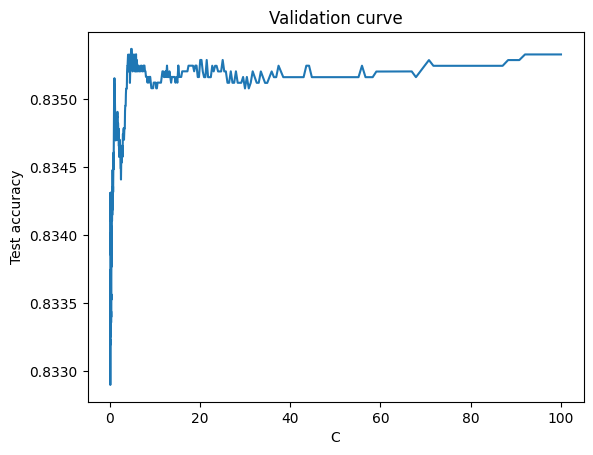

In [103]:
import matplotlib.pyplot as plt
results_df = pd.DataFrame(logreg_grid.cv_results_)
#results_df 
plt.plot(results_df['param_C'], results_df['mean_test_score'])

# Подписываем оси и график
plt.xlabel('C')
plt.ylabel('Test accuracy')
plt.title('Validation curve')
plt.show()

In [ ]:
# 2.5

#С помощью метода C_ того же объекта выведите лучшее значение C. Выведите более конкретную область графика (область ~15 точкам по x), 
#включающую лучшее значение C.

#Примечание: используйте plt.xlim.

(0.0, 15.0)

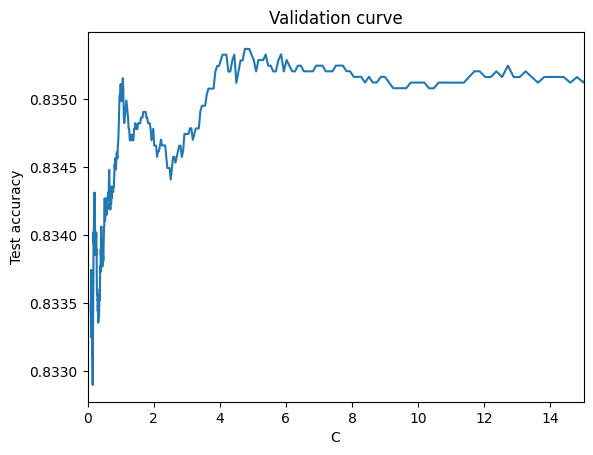

In [105]:
plt.plot(results_df['param_C'], results_df['mean_test_score'])

# Подписываем оси и график
plt.xlabel('C')
plt.ylabel('Test accuracy')
plt.title('Validation curve')
plt.xlim([0, 15])

In [ ]:
# 2.6 С помощью метода predict_proba получите вероятности принадлежности объектов тестовой выборки к классам. 
#Постройте график roc_auc для тестовой выборки и выведите значение auc.

In [108]:

logreg_grid.predict_proba(x_test)

array([[0.85173123, 0.14826877],
       [0.42340578, 0.57659422],
       [0.2725403 , 0.7274597 ],
       [0.86221249, 0.13778751],
       [0.19800556, 0.80199444],
       [0.50935111, 0.49064889],
       [0.42814275, 0.57185725],
       [0.64570494, 0.35429506],
       [0.5030108 , 0.4969892 ],
       [0.58444699, 0.41555301],
       [0.05618443, 0.94381557],
       [0.866331  , 0.133669  ],
       [0.60444744, 0.39555256],
       [0.92219864, 0.07780136],
       [0.86641961, 0.13358039],
       [0.15790401, 0.84209599],
       [0.24681106, 0.75318894],
       [0.79622246, 0.20377754],
       [0.89470375, 0.10529625],
       [0.65616577, 0.34383423],
       [0.89466573, 0.10533427],
       [0.29136474, 0.70863526],
       [0.90100441, 0.09899559],
       [0.83692514, 0.16307486],
       [0.24306507, 0.75693493],
       [0.90104651, 0.09895349],
       [0.97102018, 0.02897982],
       [0.22537279, 0.77462721],
       [0.89559436, 0.10440564],
       [0.73130229, 0.26869771],
       [0.

C:\Users\DS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWar

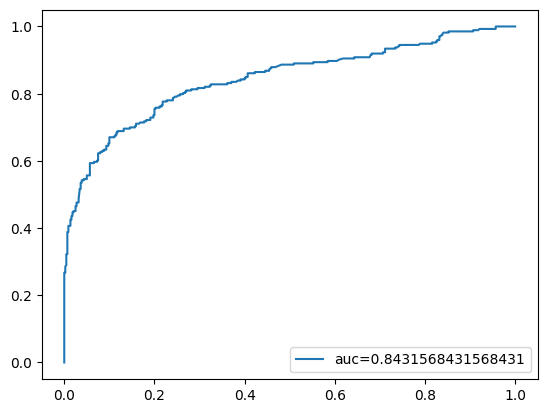

In [110]:
from sklearn.metrics import roc_auc_score, roc_curve
probas = logreg_grid.fit(x_train, y_train).predict_proba(x_train)
fpr, tpr, _ = roc_curve(y_train, probas[:, 1])
auc = roc_auc_score(y_train, probas[:, 1])
plt.plot(fpr, tpr, label="auc=" + str(auc))
plt.legend(loc=4)

In [ ]:
#Урок 2. Метрики качества классификации ч.1

#В уроке мы разбирали матрицу ошибок и некоторые метрики, основанные на терминах матрицы ошибок. 
#Здесь же посмотрим, как эти метрики применять на практике и что по ним можно выяснить.

In [ ]:
# 1.1 Выкачайте тренировочный датасет Titanic - train.csv - с сайта kaggle. 
#С помощью функции pd.read_csv() загрузите данные в датафрейм. Выведите первые 20 строк и проанализируйте данные:
#какие колонки присутствуют (более конкретная информация по ним есть на сайте kaggle), каким образом в них обозначены данные и 
#какие типы данных используются (используйте pandas.dtypes). 

In [2]:
#from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
#from sklearn.metrics import r2_score

#%matplotlib inline
data = pd.read_csv('titanic_train.csv', sep=',')
data.head(20)

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [6]:
data.dtypes

survived      int64
pclass        int64
name         object
sex          object
age         float64
sibsp         int64
parch         int64
ticket       object
fare        float64
cabin        object
embarked     object
dtype: object

In [ ]:
#1.2 Проверьте, имеются ли пропущенные значения в колонках, и выведите сумму всех пропущенных значений в каждой из колонок

In [7]:
data.isnull().sum ()



survived      0
pclass        0
name          0
sex           0
age         177
sibsp         0
parch         0
ticket        0
fare          0
cabin       687
embarked      2
dtype: int64

In [ ]:

# 1.3 Замените все пропущенные значения колонки Age на медианы в зависимости от пола человека: т.е. если пол человека 
#в строке с пропущенным значением "male", заменяете пропущенное значение возраста на медиану по всем известным возрастам мужчин, 
#и наоборот. Выведите медианы возраста в зависимости от пола. Пропущенные значения колонок Cabin и Embarked замените на U (Unknown).

#Примечание: для группировки по полу можно использовать метод df.groupby(), который имеет встроенные агрегатные функции 
#(в т.ч. для вычисления медианы). Для установки пропущенных значений в датасете воспользуйтесь функцией df.apply().


In [3]:
df =data.copy()
df.keys()

Index(['survived', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked'],
      dtype='object')

In [5]:
	
df['cabin'] = df['cabin'].fillna('U')
df['embarked'] = df['embarked'].fillna('U')


In [46]:
m_med=df.groupby(['sex'])['age']. median().reset_index()
m_med
# f_med=df.median()
# m_med=
# gender_map = {'female': f_med, 'male': m_med}
# df['age'] = df['age'].fillna(gender_map)

,sex,age
0,female,27.0
1,male,29.0


In [6]:

df1=df.copy ()

df1

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,U,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,U,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
df1.loc[((df1['sex'] == 'male') &(df1['age'].isnull() ==True ),'age')]= 29
df1.loc[((df1['sex'] == 'female') &(df1['age'].isnull() ==True ),'age')] = 27
df1

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,U,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,27.0,1,2,W./C. 6607,23.4500,U,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
#1.4 Выведите возраст пассажиров с PassengerID = [6, 20]. Убедитесь, что заполнены все пропущенные значения (воспользуйтесь функцией df.isnull() ).

In [10]:
df1.loc[6:20]#,df1['age'] == (df1['age'].isnull()== False) ]

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,U,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,U,S
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,U,C
10,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
12,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,U,S
13,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,U,S
14,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,U,S
15,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,U,S


In [11]:
	

df1.isnull().any().any()

False

In [ ]:
# 1.5 В колонке Sex замените значения на 0, если пол "male", и на 1, если "female".
#В колонке Embarked замените параметры "U", "S", "C", "Q" на 0, 1, 2, 3 соответственно.
#Отбросьте колонки PassengerId, Name, Ticket, Cabin. Выведите первые 20 строк получившегося набора данных.

In [12]:
df1.loc[((df1['sex'] == 'male') ,'sex')]= 0
df1.loc[((df1['sex'] == 'female'),'sex')] = 1
df1

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,U,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,U,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,U,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,U,S
887,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,27.0,1,2,W./C. 6607,23.4500,U,S
889,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,C


In [13]:
	
di = {"U": 0, "S":1, "C":2, "Q":3}


In [57]:
	
df1['embarked']= df1['embarked'].replace(di)
df1

,Unnamed: 0,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U,1
1,1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,2
2,2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U,1
3,3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,1
4,4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,U,1
887,887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,1
888,888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,U,1
889,889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,2


In [58]:

del df1['name']
del df1['ticket']
del df1['cabin']
#del df1['Id']
#del df1[df1.columns [0]]


In [65]:
df1.loc[:20]
#df1.to_csv('df1.csv')

,Unnamed: 0.1,Unnamed: 0,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,0,0,3,male,22.0,1,0,7.2500,1
1,1,1,1,1,female,38.0,1,0,71.2833,2
2,2,2,1,3,female,26.0,0,0,7.9250,1
3,3,3,1,1,female,35.0,1,0,53.1000,1
4,4,4,0,3,male,35.0,0,0,8.0500,1
5,5,5,0,3,male,NaN,0,0,8.4583,3
6,6,6,0,1,male,54.0,0,0,51.8625,1
7,7,7,0,3,male,2.0,3,1,21.0750,1
8,8,8,1,3,female,27.0,0,2,11.1333,1
9,9,9,1,2,female,14.0,1,0,30.0708,2


In [ ]:
# 1.6 Приступим к построению классификаторов. Условимся, что, если функция или объект модели имеют параметр random_state, то устанавливаем 
#его равным 17 в каждом из случаев.
#Разделите данные на тренировочный и тестовый датасеты, установив размер тестового как 0.25 
#(первая колонка Survived является целевой, поэтому необходимо сначала ее отделить от признаков).

In [66]:
df2=df1['survived'].copy()

df2

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 891, dtype: int64

In [67]:
#df2.to_csv('df2.csv')

In [77]:
#del df1['survived']
df1.keys()

Index(['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked'], dtype='object')

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df1, 
                                                    df2,
                                                    random_state=17) # random_state - для воспроизводимости

print(f'X_train shape: {x_train.shape}, y_train shape: {y_train.shape},\n'
      f'X_test shape: {x_test.shape}, y_test shape: {y_test.shape}')

X_train shape: (668, 8), y_train shape: (668,),
X_test shape: (223, 8), y_test shape: (223,)


In [ ]:
#1.7 Обучите на полученных выборках несколько классификаторов, которые импортированы ниже.

#Примечание: в методе ближайших соседей используйте количество соседей, равное 5.
# Очевидно, в этом случае использовать метрику accuracy, которую мы применяли до этого, не совсем правильно: 
#она не даст верную оценку классификатору, потому как выживших явно меньше, чем погибших.
# Вспомним про такие метрики как точность и полнота. Здесь они подойдут хорошо, так как у нас имеются положительный и отрицательный классы,
#и определить корректно один из них может оказаться более важным .


In [19]:
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.linear_model import LogisticRegression

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
knn = KNeighborsClassifier(n_neighbors=5)
knn_model = knn.fit(x_train, y_train)
knn_predictions = knn_model.predict(x_test)
print('dataset_1')
print(knn_predictions)
#print(y_test)

dataset_1
[0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1
 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 1 0
 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0
 1 0 1 0 1 0 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 1 0 1 0 0 1 1 0 0
 1 1 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 0 0
 1]


In [35]:
from sklearn import metrics
#print precision value of model
print(metrics.precision_score (y_test, knn_predictions))

0.7391304347826086


In [22]:
#print recall value of model
print(metrics. recall_score (y_test, knn_predictions))

0.5543478260869565


In [36]:
nb = GaussianNB()
nb_model = nb.fit(x_train, y_train)
nb_predictions = nb_model.predict(x_test)
nb_predictions

array([0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1], dtype=int64)

In [37]:
#print precision value of model
print(metrics.precision_score (y_test, nb_predictions))
#print recall value of model
print(metrics. recall_score (y_test, nb_predictions))

1.0
1.0


In [31]:
dtc = DecisionTreeClassifier()
dtc_model = dtc.fit(x_train, y_train)
dtc_predict = dtc_model.predict(x_test)

dtc_predict

array([0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1], dtype=int64)

In [32]:
#print precision value of model
print(metrics.precision_score (y_test, dtc_predict))
#print recall value of model
print(metrics. recall_score (y_test, dtc_predict))

1.0
1.0


In [38]:
lr = LogisticRegression()
lr_model =lr.fit(x_train, y_train)
lr_predict = lr_model.predict(x_test)

C:\Users\DS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [34]:
#print precision value of model
print(metrics.precision_score (y_test, lr_predict))
#print recall value of model
print(metrics. recall_score (y_test, lr_predict))

1.0
1.0


In [ ]:
# 1.8

#В каждом из пунктов следующего теста выберите, что важнее максимизировать: точность (precision) или полноту (recall). Выпишите ответы.

 #   Вероятность того, что при определенной поломке самолета он сможет долететь до пункта назначения (1 - долетел, 0 - не долетел).

точность (precision)

#    Предсказание, представляет ли человек опасность, по анализу психического состояния (1 - представляет опасность, 0 - не представляет опасности).

точность (precision)

#    Предсказание ухода клиента (1 - клиент ушел, 0 - остался).

Recall (полнота)

#    Выявление рака на основе медицинских показателей (1 - болен раком, 0 - здоров).

точность (precision)

#    Предсказание летальности при наблюдаемой мутации (1 - выживание, 0 - летальный исход).

точность (precision)

#    Определение важности происшествия для экстренных служб (1 - важно, 0 - неважно).

точность (precision)

 #   Окупятся ли вложения в бизнес (1 - окупятся, 0 - не окупятся).

Recall (полнота)



In [ ]:
# 1.9

#Определите, что важнее использовать в случае датасета Titanic: полноту или точность. Объясните, почему.
 здесь нам актуальнее минимизировать FP,т.к. информация носит исторический характер.


In [ ]:
#1.10

#Для каждого классификатора выведите матрицу ошибок и самостоятельно рассчитайте метрику recall 
#(расчеты должны присутствовать). Проверьте расчеты, воспользовавшись встроенной метрикой recall_score.

In [40]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, lr_predict)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[131   0]
 [  0  92]]


In [ ]:
recall = 131/(131+0)=1

In [41]:
confusion = confusion_matrix(y_test, dtc_predict)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[131   0]
 [  0  92]]


In [ ]:
recall = 131/(131+0)=1

In [42]:
confusion = confusion_matrix(y_test, nb_predictions)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[131   0]
 [  0  92]]


In [ ]:
recall = 131/(131+0)=1

In [43]:
confusion = confusion_matrix(y_test, knn_predictions)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[113  18]
 [ 41  51]]


In [ ]:
recall = 131/(131+41)=0.76

In [44]:
print(metrics.precision_score (y_test, knn_predictions))

0.7391304347826086
